# Dallas market visualizations.R

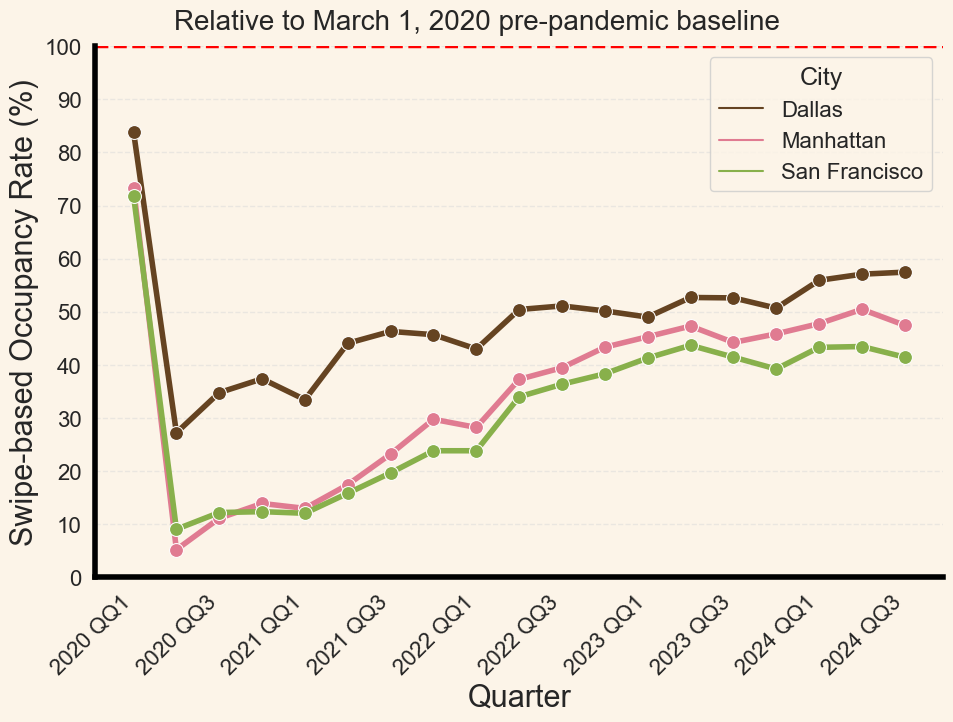

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
kastle = pd.read_csv("/Users/aryan/Desktop/Desktop/Datafest/DartMonkeyDataFest/data/Major Market Occupancy Data-revised.csv")

# Prepare the data
def prepare_city_data(df, market_name, city_name):
    temp = df[df['market'] == market_name].copy()
    temp['year_quarter'] = temp['year'].astype(str) + ' Q' + temp['quarter'].astype(str)
    temp['city'] = city_name
    return temp

# Filter for cities
dallas = prepare_city_data(kastle, 'Dallas/Ft Worth', 'Dallas')
new_york = prepare_city_data(kastle, 'Manhattan', 'Manhattan')
san_francisco = prepare_city_data(kastle, 'San Francisco', 'San Francisco')

# Combine
combined_kastle = pd.concat([dallas, new_york, san_francisco])

# Multiply by 100 to get percentages
combined_kastle['avg_occupancy_percentage'] = combined_kastle['avg_occupancy_proportion'] * 100

# Setup style
sns.set_theme(style="white", rc={
    "axes.edgecolor": "black",         # stronger axis border
    "axes.linewidth": 4.0,            # thicker axis lines
    "grid.color": "0.85",
    "axes.facecolor": "#fcf4e8",      # still keeping soft tones
    "figure.facecolor": "#fcf4e8"
})

# Custom palette
custom_palette = {
    "Dallas": "#654321",          # dark brown
    "Manhattan": "#e07b91",        # soft pink-red
    "San Francisco": "#88b04b"    # soft green
}

# Plot
fig, ax = plt.subplots(figsize=(10, 8))  # even a bit bigger for full-slide dominance

sns.lineplot(
    data=combined_kastle,
    x="year_quarter",
    y="avg_occupancy_percentage",
    hue="city",
    palette=custom_palette,
    linewidth=4,    # Thicker trend lines
    marker="o",
    markersize=10,
    ax=ax
)

# Horizontal line at 100%
ax.axhline(y=100, color="red", linestyle="--", linewidth=2.5)

# No main title
# Just subtitle manually if needed
fig.suptitle("Relative to March 1, 2020 pre-pandemic baseline", fontsize=20, y=0.92)

# X-axis formatting
ax.set_xticks(range(0, len(combined_kastle['year_quarter'].unique()), 2))
ax.set_xticklabels(combined_kastle['year_quarter'].unique()[::2], rotation=45, ha='right', fontsize=16)

# Y-axis formatting
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 110, 10))
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

# Labels
ax.set_xlabel("Quarter", fontsize=22)
ax.set_ylabel("Swipe-based Occupancy Rate (%)", fontsize=22)

# Legend
ax.legend(title="City", title_fontsize=18, fontsize=16, loc='upper right')

# Grid
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)

# Remove top and right spines
sns.despine()

# Tight layout
plt.tight_layout(pad=2.0)

# Save - Transparent Background
plt.savefig("kastle_recovery_plot_final_transparent.png", dpi=300, bbox_inches='tight', transparent=True)

# Show
plt.show()


# Dallas lease size analysis

Pre-COVID Mean Lease Size: 13289.76 sqft
Post-COVID Mean Lease Size: 12988.12 sqft
T-Statistic: 0.8860
P-Value: 0.3757
Result: No statistically significant difference — lease sizes stayed about the same.


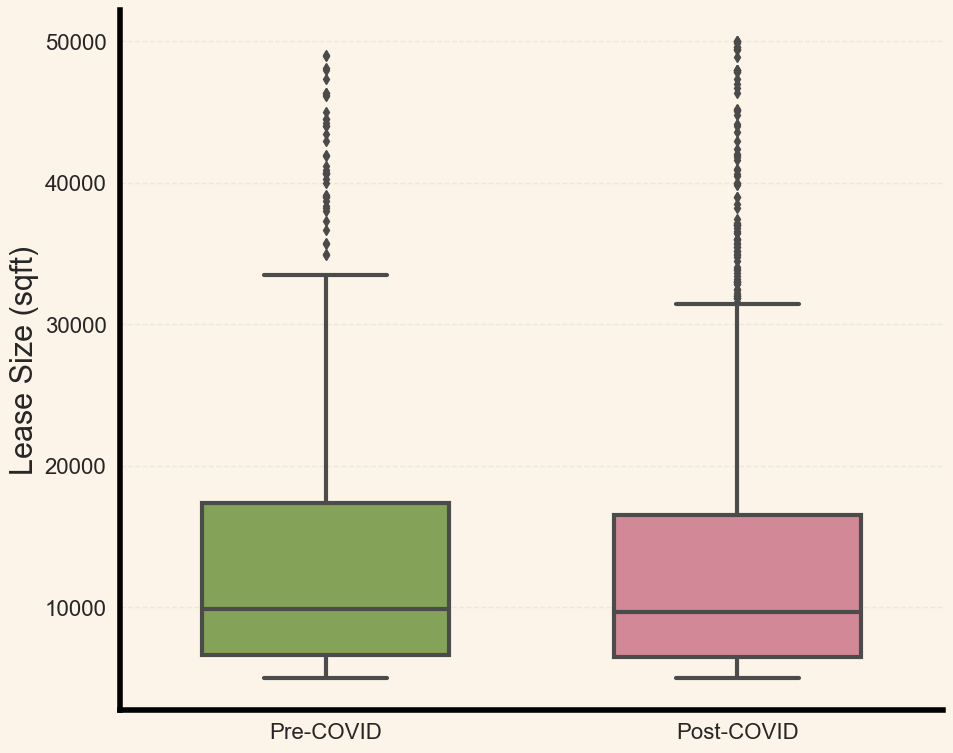

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load data
leases = pd.read_csv("/Users/aryan/Desktop/Desktop/Datafest/DartMonkeyDataFest/data/Leases.csv")

# Filter for Dallas leases
dallas_leases = leases[
    leases['market'].str.contains("Dallas", case=False, na=False) &
    (leases['year'] >= 2018) & (leases['year'] <= 2024) &
    (leases['leasedSF'] >= 5000) & (leases['leasedSF'] <= 50000)
]

# Split into pre- and post-COVID
pre_covid = dallas_leases[dallas_leases['year'] < 2020]['leasedSF'].dropna()
post_covid = dallas_leases[dallas_leases['year'] >= 2020]['leasedSF'].dropna()

# Two-Sample t-test
t_statistic, p_value = ttest_ind(pre_covid, post_covid, equal_var=False)

print(f"Pre-COVID Mean Lease Size: {pre_covid.mean():.2f} sqft")
print(f"Post-COVID Mean Lease Size: {post_covid.mean():.2f} sqft")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Statistically significant difference — lease sizes changed after COVID.")
else:
    print("Result: No statistically significant difference — lease sizes stayed about the same.")

# Plot
sns.set_theme(style="white", rc={
    "axes.edgecolor": "black",
    "axes.linewidth": 4.0,
    "grid.color": "0.85",
    "axes.facecolor": "#fcf4e8",
    "figure.facecolor": "#fcf4e8"
})

fig, ax = plt.subplots(figsize=(10, 8))

# Create boxplot
lease_data = pd.DataFrame({
    "Lease Size (sqft)": pd.concat([pre_covid, post_covid], ignore_index=True),
    "Period": ["Pre-COVID"] * len(pre_covid) + ["Post-COVID"] * len(post_covid)
})

sns.boxplot(
    data=lease_data,
    x="Period",
    y="Lease Size (sqft)",
    palette={"Pre-COVID": "#88b04b", "Post-COVID": "#e07b91"},
    linewidth=3,
    fliersize=5,
    width=0.6,
    ax=ax
)

# Axis labels
ax.set_xlabel("", fontsize=22)
ax.set_ylabel("Lease Size (sqft)", fontsize=22)

# Grid
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)

# Tick params
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

# Remove top and right spines
sns.despine()

# Tight layout
plt.tight_layout(pad=2.0)

# Save plot - transparent
plt.savefig("dallas_lease_size_comparison_transparent.png", dpi=300, bbox_inches='tight', transparent=True)

# Show
plt.show()


# Lease comparisons.R (doesnt rlly work)

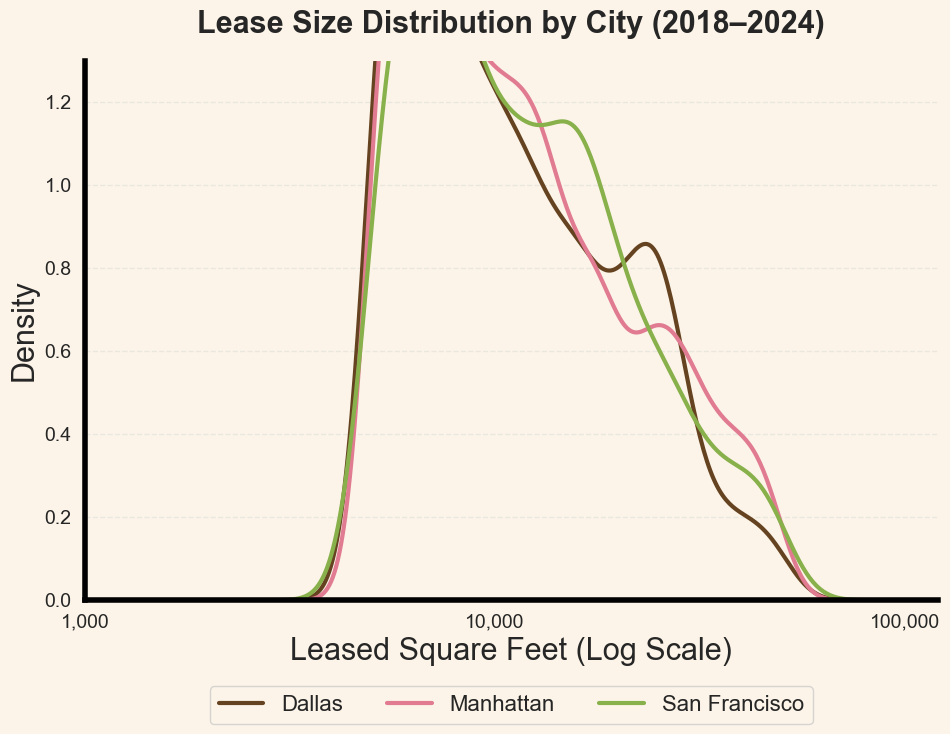

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from matplotlib.ticker import FuncFormatter

# Load data
leases = pd.read_csv("/Users/aryan/Desktop/Desktop/Datafest/DartMonkeyDataFest/data/Leases.csv")

# Filter leases
leases_filtered = leases[
    leases['market'].str.contains("Dallas|Manhattan|San Francisco", case=False, na=False) &
    (leases['leasedSF'] >= 5000) & (leases['leasedSF'] <= 50000)
].copy()

leases_filtered['city'] = leases_filtered['market'].str.extract(r'(Dallas|Manhattan|San Francisco)', expand=False)

# Set style
sns.set_theme(style="white", rc={
    "axes.edgecolor": "black",
    "axes.linewidth": 4.0,
    "grid.color": "0.85",
    "axes.facecolor": "#fcf4e8",
    "figure.facecolor": "#fcf4e8"
})

fig, ax = plt.subplots(figsize=(10, 8))

colors = {
    "Dallas": "#654321",
    "Manhattan": "#e07b91",
    "San Francisco": "#88b04b"
}

# Instead of linear space, use log10 space
x_grid_log = np.linspace(np.log10(1000), np.log10(120000), 500)
x_ticks = [1000, 10000, 100000]

# Manual density estimate in log10 space
for city, color in colors.items():
    data = leases_filtered[leases_filtered['city'] == city]['leasedSF'].dropna()
    log_data = np.log10(data)   # LOG transform the data
    kde = gaussian_kde(log_data, bw_method='silverman')
    y = kde(x_grid_log)
    
    ax.plot(10**x_grid_log, y, label=city, color=color, linewidth=3)

# Axes
ax.set_xscale('log')
ax.set_xlim(1000, 120000)
ax.set_ylim(0, 1.3)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.set_xlabel("Leased Square Feet (Log Scale)", fontsize=22)
ax.set_ylabel("Density", fontsize=22)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Title
ax.set_title("Lease Size Distribution by City (2018–2024)", fontsize=22, fontweight='bold', pad=20)

# Legend
ax.legend(title='', fontsize=16, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)

# Grid
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)

sns.despine()

# Save
plt.tight_layout(pad=2.0)
plt.savefig("lease_size_distribution_python_corrected_logfixed.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()
